# **Credit card Fraud Detection**

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Random Projects/Credit card fraud detection/card_transdata.csv')
df.head(20)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0
5,5.586408,13.261073,0.064768,1,0,0,0,0
6,3.724019,0.956838,0.278465,1,0,0,1,0
7,4.848247,0.320735,1.273050,1,0,1,0,0
8,0.876632,2.503609,1.516999,0,0,0,0,0
9,8.839047,2.970512,2.361683,1,0,0,1,0


## Detecting Outliers

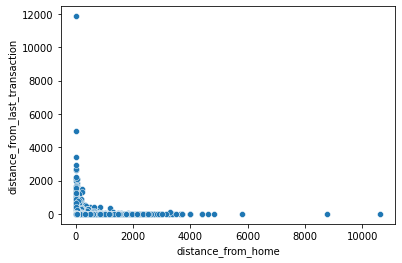

In [4]:
sns.scatterplot(x = df.iloc[:, 0], y = df.iloc[:, 1], data = df)

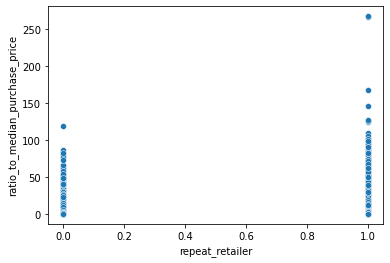

In [5]:
sns.scatterplot(y = df.iloc[:, 2], x = df.iloc[:, 3], data = df)

## Removing Outlier

In [6]:
arr1 = np.where(df['distance_from_home']>4000)
arr2 = np.where(df['distance_from_last_transaction']>4000)
arr3 = np.where(df['ratio_to_median_purchase_price']>100)


In [7]:
df.drop(arr1[0], inplace = True)
df.drop(arr2[0], inplace = True)
df.drop(arr3[0], inplace = True)

In [8]:
df.shape

(999980, 8)

## Feature Scaling

In [17]:
features = df.iloc[:, :-1].values
labels = df.iloc[:, -1].values

In [18]:
from sklearn.preprocessing import StandardScaler
sts = StandardScaler()
features = sts.fit_transform(features)

## Splitting the data

In [19]:
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.2, random_state = 42)

## Model training

### Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(features_train, labels_train)

LogisticRegression()

In [21]:
labels_pred = model.predict(features_test)

from sklearn.metrics import accuracy_score
accuracy_score(labels_test, labels_pred)

0.9584541690833817

### KNN Classification



In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(features_train, labels_train)

labels_pred = classifier.predict(features_test)

accuracy_score(labels_test, labels_pred)

0.9987499749995

In [16]:
from sklearn.metrics import confusion_matrix, r2_score, classification_report

print(classification_report(labels_test, labels_pred))
print(r2_score(labels_test, labels_pred))
print(confusion_matrix(labels_test, labels_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    182428
           1       1.00      0.99      0.99     17568

    accuracy                           1.00    199996
   macro avg       1.00      1.00      1.00    199996
weighted avg       1.00      1.00      1.00    199996

0.9843991773903624
[[182343     85]
 [   165  17403]]
